# Plain Vanilla option pricing

In [1]:
from array import array
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure

In [2]:
def read(file):
    data = np.genfromtxt(file)
    measure = data[::, 0]
    errors = data[::, 1]
    return measure, errors

In [3]:
N = 100
x = np.arange(N)+1
call = 14.975790778311286
put = 5.4595325819072364

## DIRECT SAMPLING

The spot price for an asset at a time $t$ that is valued $S(0)$ in the beginning is distributed as

$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)$ is normally distributed with mean $0$ and variance $t$.
    
Here, to give an estimate of the right price (that is, the profit one can potentially make off of these assets) we sample this distribution at delivery time $T=1$, in both the call and put cases. Other parameters are $\sigma$, i.e. the volatility, and $\mu$, the free interest rate.

Here $10^6$ samples are drawn and then blocked in $100$ subsets

## Call Options

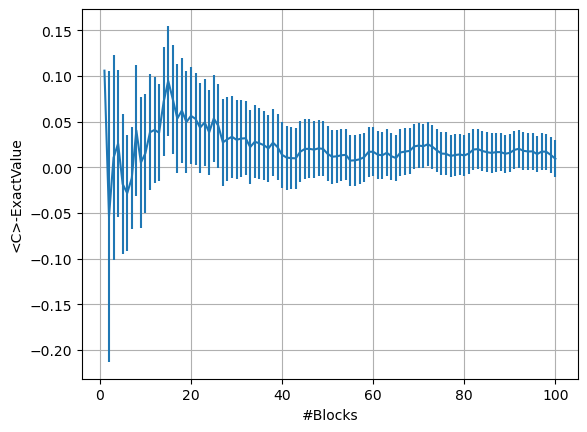

In [12]:
res = read('OUTPUT/CallPriceDirect.dat')
plt.errorbar(x, res[0] - call, yerr = res[1])
plt.xlabel('#Blocks')
plt.ylabel('<C>-ExactValue')
plt.grid(True)
plt.show()

### Results

In [13]:
print('Result = ', res[0][N-1]) 
print('Error = ', res[1][N-1]) 
print('Accordance with expected value: ', (res[0][N-1] - call)**2/res[1][N-1]**2)

Result =  14.9852
Error =  0.0202323
Accordance with expected value:  0.21628026346180565


## Put Options

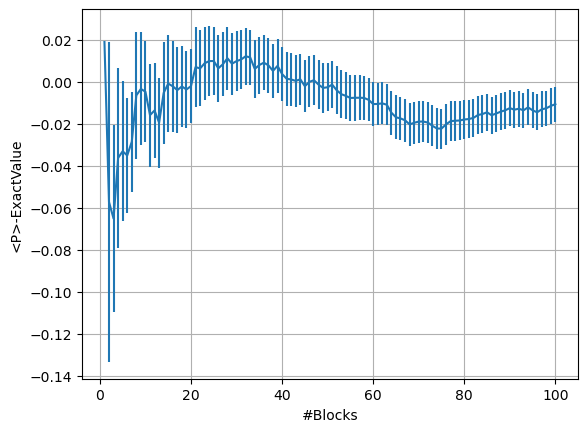

In [14]:
res = read('OUTPUT/PutPriceDirect.dat')
plt.errorbar(x, res[0] - put, yerr = res[1])
plt.xlabel('#Blocks')
plt.ylabel('<P>-ExactValue')
plt.grid(True)
plt.show()

### Results

In [15]:
print('Result = ', res[0][N-1]) 
print('Error = ', res[1][N-1]) 
print('Accordance with expected value: ', (res[0][N-1] - put)**2/res[1][N-1]**2)

Result =  5.44897
Error =  0.00840974
Accordance with expected value:  1.5775206071357148


## PATH OF THE PRICE

Another approach is to simulate the random walk that the spot price makes between the beginning and the delivery time. We know that it follows this law

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
    
where we have divided the interval between the beginning and the delivery time in sub-intervals marked by $t_i$.

We divide the path in $100$ steps and consider $10^5$ random walks. At the end of the walk the walkers are divided in $100$ blocks over which the profit and its statistical uncertainty is calculated

## Call Options

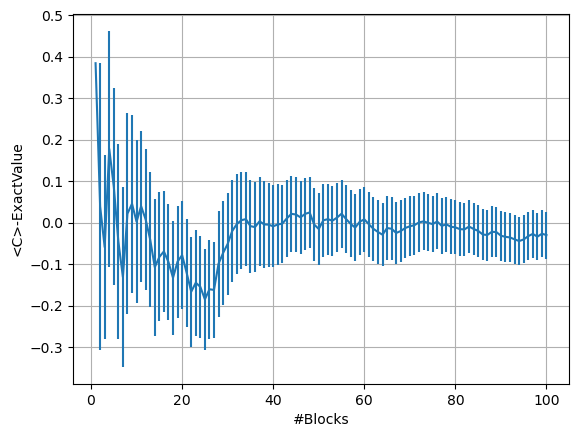

In [8]:
res = read('OUTPUT/CallPriceWalk.dat')
plt.errorbar(x, res[0] - call, yerr = res[1])
plt.xlabel('#Blocks')
plt.ylabel('<C>-ExactValue')
plt.grid(True)
plt.show()

### Results

In [9]:
print('Result = ', res[0][N-1]) 
print('Error = ', res[1][N-1]) 
print('Accordance with expected value: ', (res[0][N-1] - call)**2/res[1][N-1]**2)

Result =  14.946
Error =  0.0567512
Accordance with expected value:  0.2755583662623813


## Put Options

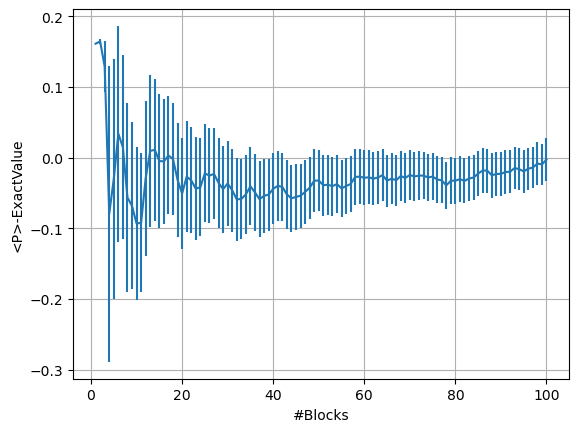

In [10]:
res = read('OUTPUT/PutPriceWalk.dat')
plt.errorbar(x, res[0] - put, yerr = res[1])
plt.xlabel('#Blocks')
plt.ylabel('<P>-ExactValue')
plt.grid(True)
plt.show()

### Results

In [11]:
print('Result = ', res[0][N-1]) 
print('Error = ', res[1][N-1]) 
print('Accordance with expected value: ', (res[0][N-1] - put)**2/res[1][N-1]**2)

Result =  5.45673
Error =  0.0300435
Accordance with expected value:  0.00870192982632663
